In [13]:
# Importing libraries for python
import numpy as np
import numpy.random as rdm
import re
import math
import time
import matplotlib.pyplot as plt

In [2]:
def poly_eva(coefs, x, canon = True):
    ## Function to evaluate the polynomials, it returns a float number
    r = 0.0
    if canon:
        for coef in coefs:
            r = x * r
            r = coef + r
        return r
    else:
        r = 1
        for coef in coefs[1:]:
            r = r * (x - coef)
        if coefs[0] < 0:
            r = - r
        return r

def rdm_compr(p1, p2, k=5,bm=True):
    ## P1 expects the Canonical-form poly
    ## P2 expects the roots-form poly
    start = 0
    if not bm: start = time.time()
    # Sampling in the sample space of {1, ..., 100d}
    d = len(p1) - 1 ## Degree of the function, as in canonical form, is the number of coeficients minus 1 (taking into account the 0)
    e = True ## e turns False if the polynomials get distinct, stays True while is not proven different.
    for _ in range(k):
        x = rdm.randint(1, 100*d+1)
        f = poly_eva(p1, x)
        g = poly_eva(p2, x, False)
        if not math.isclose(f, g):
            e = False 
            break
            
    if not bm:
        if not e:
            print('The polynomials are different.')
            return 0
        else:
            print("The polynomials are equal within an error of %5f" %(1/100**k))
        tot_time = (time.time()-start)*1000 # in ms
        print("%.4f ms" % tot_time)
            return 1
    else:
        if e:
            return 1
        else:
            return 0

In [ ]:
while 1:
    canon = input('Please. Input the canonical form separated with spaces.\n')
    expanded = input('Please. Input the numbers for the expanded form. Use a 1 or -1 in the begining to give the sign.\n')
    canon_ar = re.findall('[0-9\.\-]+', canon)
    expanded_ar = re.findall('[0-9\.\-]+', expanded)
    if len(canon_ar) != len(expanded_ar):
        print('The expected number of elementes is not equal on the arrays. Please check again')
    else:
        print('Ok!')
        p1,p2 = [], []
        for i in range(len(canon_ar)):
            p1.append(float(canon_ar[i]))
            p2.append(float(expanded_ar[i]))
        rdm_compr(p1,p2,bm=False)
        break



In [24]:
## Generate a poly samples to test
file = open('tests.txt', 'w')

for i in range(3,21):
    p = []
    file.write('1 ')
    for j in range(i):
        new_root = rdm.randint(1, 100*i+1)
        p.append(new_root)
        file.write(str(new_root)+' ')
    p_canon = np.poly(p)
    file.write('; ')
    for term in p_canon:
        file.write(str(term)+' ')
    file.write('\n')
file.close()
    
    

In [32]:
# Python benchmark

avr_times = []
correct = []

#Warm loop
i = 0
while i != 1000:
    i += 1
    rdm.choice(10212, 100)
    
for d in range(3,21):
    p2 = [1]
    p2_ = rdm.choice(1*d+1, d, replace=False).tolist()
    p2 = p2 + p2_
    p1 = np.poly(p2_).tolist()
    i,c,t = 0,0,[]
    while i < 1000:
        start = time.time()
        c += rdm_compr(p1,p2)
        t.append((time.time() - start)*1000) ## in ms
        i += 1
    avr_times.append(np.mean(t))
    correct.append(c)



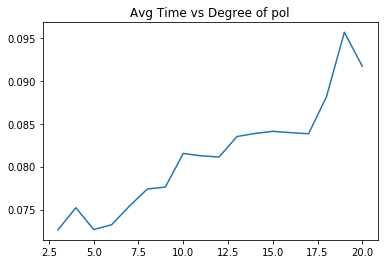

In [33]:
fig, axs = plt.subplots()
plt.plot(range(3,21),avr_times)
plt.title("Avg Time vs Degree of pol")
plt.show()